<a class="anchor" id="0.1"></a>
# **Table of Contents** 

1.	[Introduction to Natural Language Processing](#1)

   - 1.1 [Loading Libraries](#1.1)
   - 1.2 [Loading Train and Test Datset](#1.2)
   - 1.3 [Exploratory Data Analysis](#1.3)
   - 1.4 [Plotting Null Data](#1.4)
   - 1.5 [Plotting Labelled Data](#1.5)
   - 1.6 [Word Cloud for Most Frequent Words](#1.6)
   - 1.7 [Word Cloud for Most Positive Words](#1.7)
   - 1.8 [Word Cloud for Most Negative Words](#1.8)


2.	[Basic feature extraction using text data](#2)

   - 2.1 [Count number of words](#2.1)
   - 2.2 [Count number of characters](#2.2)
   - 2.3 [Average word length](#2.3)
   - 2.4 [Number of stopwords](#2.4)
   - 2.5 [Number of special characters](#2.5)
   - 2.6 [Number of numerics](#2.6)
   - 2.7 [Number of uppercase words](#2.7)
   
   
3.	[Basic Text Pre-processing of text data](#3)

   - 3.1 [CountVectorization](#3.1)
   - 3.2 [HashingVectorizer](#3.2)
   - 3.3 [Lower casing](#3.3)
   - 3.4 [Punctuation removal](#3.4)
   - 3.5 [Stopwords removal](#3.5)
   - 3.6 [Frequent words removal](#3.6)
   - 3.7 [Rare words removal](#3.7)
   - 3.8 [Spelling correction](#3.8)
   - 3.9 [Tokenization](#3.9)
   - 3.10 [Stemming](#3.10)
   - 3.11 [Lemmatization](#3.11)


4.	[Advance Text Processing](#4)

   - 4.1 [N-grams](#4.1)
   - 4.2 [Term Frequency](#4.2)
   - 4.3 [Inverse Document Frequency](#4.3)
   - 4.4 [Term Frequency-Inverse Document Frequency (TF-IDF)](#4.4)
   - 4.5 [Bag of Words](#4.5)
   - 4.6 [Sentiment Analysis](#4.6)

# **1. Introduction to Natural Language Processing** <a class="anchor" id="1"></a>


Natural Language Processing is a subfield of linguistics, computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.

**Challenges in natural language processing frequently involve** - speech recognition, natural language understanding and natural language generation

## **1.1 Importing Libraries** <a class="anchor" id="1.1"></a>

In [1]:
import numpy as np                                    # used for linear algebra
import pandas as pd                                   # used for data analysis,manipulation,processing

## **1.2 Reading Dataset** <a class="anchor" id="1.2"></a>

In [2]:
train = pd.read_csv("C:\\Users\\Gunjan\\Twitter Sentiment Analysis\\train.csv\\train.csv")
test = pd.read_csv("C:\\Users\\Gunjan\\Twitter Sentiment Analysis\\test.csv\\test.csv")

### **Preview dataset**

In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


## **1.3 Exploratory Data Analysis** <a class="anchor" id="1.3"></a>

## **1.4 Plotting Missing Values** <a class="anchor" id="1.1"></a>

<AxesSubplot:>

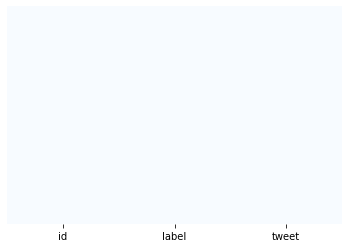

In [5]:
import seaborn as sns
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

### From the plot we can infer that there are no missing values in the data

## **1.5 Plotting Labels** <a class="anchor" id="1.1"></a>

<AxesSubplot:xlabel='label', ylabel='count'>

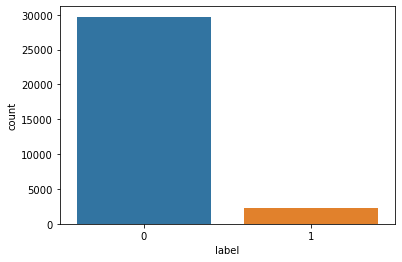

In [6]:
sns.countplot(x = train['label'] ,data = train)

## **1.6 Visualizing Most Frequent Words** <a class="anchor" id="1.1"></a>

In [7]:
from wordcloud import WordCloud

In [8]:
sentences = train['tweet'].tolist()
len(sentences)

31962

In [9]:
sentences_as_single_string = " ".join(sentences)

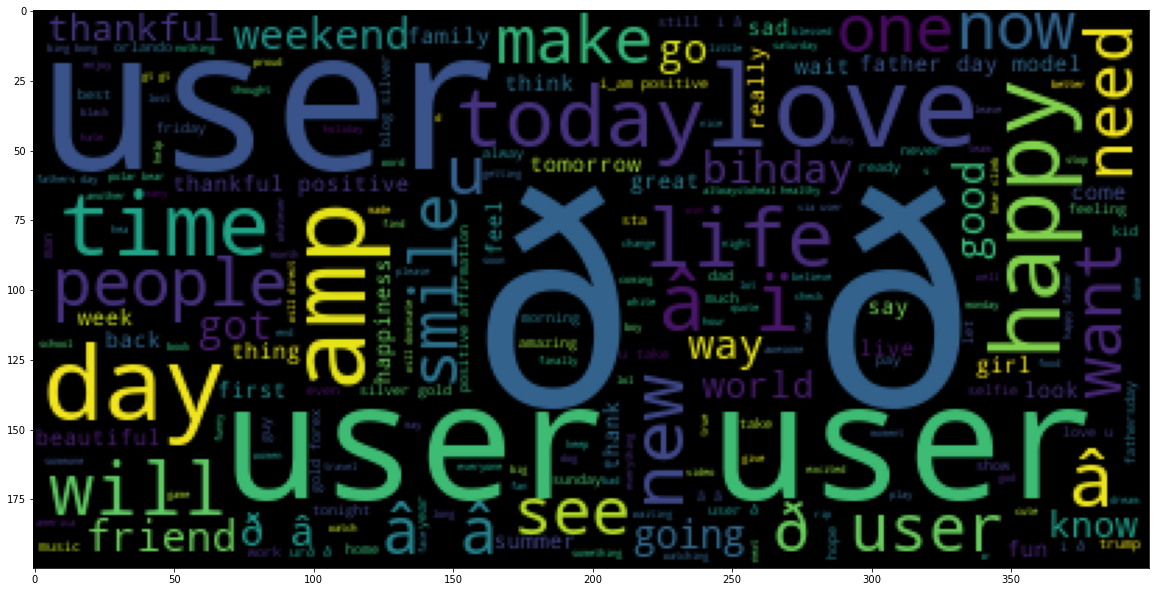

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_single_string))

### From this plot, we can understand that positive words are more as compared to the negative words, as we already know that the data is imbalanced as we have more records of positive sentiments (29720) against the negative sentiments (2242)

## Size of words shows the frequency of this word in this document 

## **1.7 Word Cloud for Positive Words** <a class="anchor" id="1.1"></a>

In [11]:
positive = train[train['label']==0]['tweet']
positive

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31956    off fishing tomorrow @user carnt wait first ti...
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31961                     thank you @user for you follow  
Name: tweet, Length: 29720, dtype: object

## Understanding positive words from positive sentiments 

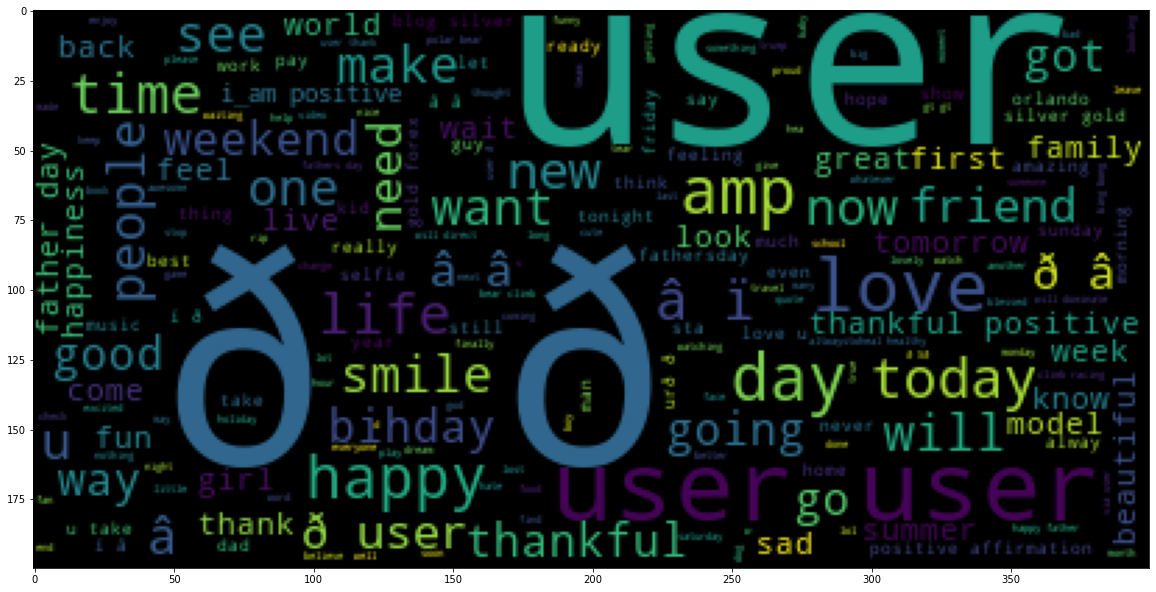

In [12]:
pos = positive.tolist()
sentences_as_single_positive = " ".join(pos)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_single_positive))

## Postive Words : Smile, good, great, beautiful, happy, love, etc.

## **1.8 Word Cloud for Negative Words** <a class="anchor" id="1.1"></a>

### Analyzing the negative words from this negative sentiments 

In [13]:
negative = train[train['label']==1]['tweet']
negative

13       @user #cnn calls #michigan middle school 'buil...
14       no comment!  in #australia   #opkillingbay #se...
17                                  retweet if you agree! 
23         @user @user lumpy says i am a . prove it lumpy.
34       it's unbelievable that in the 21st century we'...
                               ...                        
31934    lady banned from kentucky mall. @user  #jcpenn...
31946    @user omfg i'm offended! i'm a  mailbox and i'...
31947    @user @user you don't have the balls to hashta...
31948     makes you ask yourself, who am i? then am i a...
31960    @user #sikh #temple vandalised in in #calgary,...
Name: tweet, Length: 2242, dtype: object

### Understanding negative words from negative sentiments 

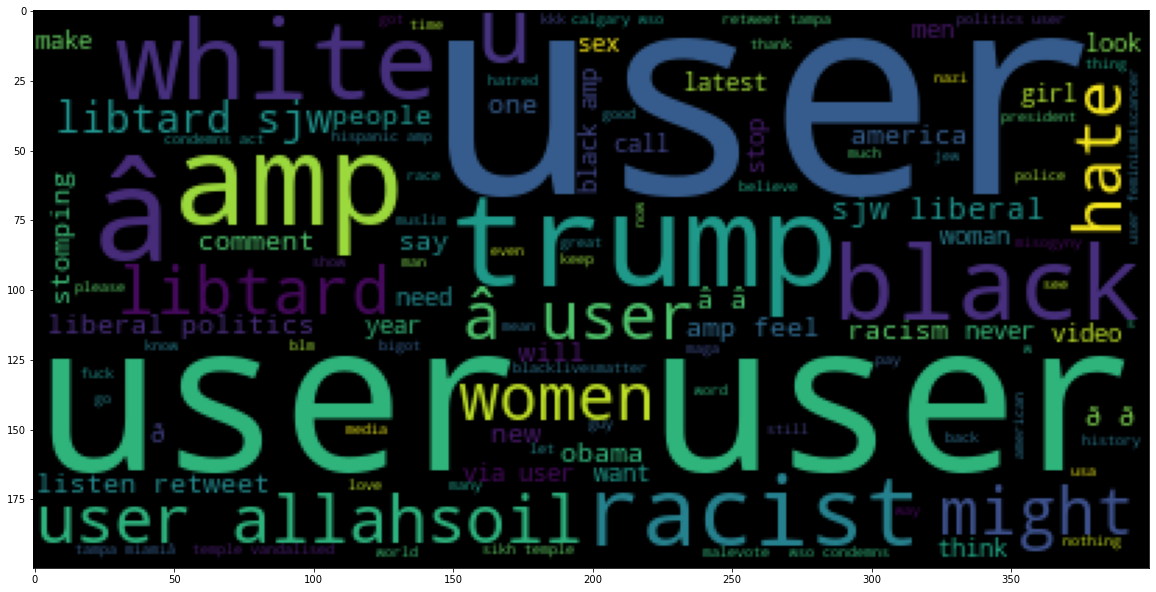

In [14]:
neg = negative.tolist()
sentences_as_single_negative = " ".join(neg)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_single_negative))

# Negative Words : bigot, racist,hate, black, condemn, etc.

# **2. Basic feature extraction using text data** <a class="anchor" id="2"></a>

## **2.1 Count number of words** <a class="anchor" id="2.1"></a>


- One of the most basic requirement in NLP analysis is to count the number of words in each tweet. The idea behind this is that **the negative sentiments contain a lesser amount of words than the positive ones**.

- We can accomplish the above task (count the number of words) by using the **split** function in python as follows-

In [15]:
def num_of_words(df):
    df['word_count'] = df['tweet'].apply(lambda x : len(str(x).split(" ")))
    print(df[['tweet','word_count']].head())

In [16]:
num_of_words(train)

                                               tweet  word_count
0   @user when a father is dysfunctional and is s...          21
1  @user @user thanks for #lyft credit i can't us...          22
2                                bihday your majesty           5
3  #model   i love u take with u all the time in ...          17
4             factsguide: society now    #motivation           8


In [17]:
num_of_words(test)

                                               tweet  word_count
0  #studiolife #aislife #requires #passion #dedic...          12
1   @user #white #supremacists want everyone to s...          20
2  safe ways to heal your #acne!!    #altwaystohe...          15
3  is the hp and the cursed child book up for res...          24
4    3rd #bihday to my amazing, hilarious #nephew...          18


- We can see that word counts in every tweet has been calculated above.

##  **2.2 Count number of characters**  <a class="anchor" id="2.2"></a>


- We can also calculate the number of characters in every tweet. The intuition is same as above.

- This can be accomplised by calculating the length of the tweet as follows -

In [18]:
def num_of_chars(df):
    df['char_count'] = df['tweet'].str.len()                                     # this also includes spaces
    print(df[['tweet','char_count']].head())

In [19]:
num_of_chars(train)

                                               tweet  char_count
0   @user when a father is dysfunctional and is s...         102
1  @user @user thanks for #lyft credit i can't us...         122
2                                bihday your majesty          21
3  #model   i love u take with u all the time in ...          86
4             factsguide: society now    #motivation          39


In [20]:
num_of_chars(test)

                                               tweet  char_count
0  #studiolife #aislife #requires #passion #dedic...          90
1   @user #white #supremacists want everyone to s...         101
2  safe ways to heal your #acne!!    #altwaystohe...          71
3  is the hp and the cursed child book up for res...         142
4    3rd #bihday to my amazing, hilarious #nephew...          93


- We can see that character counts in every tweet has been calculated above.

- The above calculation will also include the number of spaces, which we can remove, if required.

## **2.3 Average word length** <a class="anchor" id="2.3"></a>



- Now, number of words and number of characters are important. But, there is another feature which is also important is **average word length** of each tweet. This feature can help us to improve our model.

- We can accomplish the above task by simply taking the sum of the length of all the words and divide it by the total length of the tweet.

In [21]:
def avg_word(sentence):
    words = sentence.split()    
    return (sum(len(word) for word in words)/len(words))

In [22]:
def avg_word_length(df):
    df['avg_word'] = df['tweet'].apply(lambda x: avg_word(x))
    print(df[['tweet','avg_word']].head())

In [23]:
avg_word_length(train)

                                               tweet  avg_word
0   @user when a father is dysfunctional and is s...  4.555556
1  @user @user thanks for #lyft credit i can't us...  5.315789
2                                bihday your majesty  5.666667
3  #model   i love u take with u all the time in ...  4.928571
4             factsguide: society now    #motivation  8.000000


In [24]:
avg_word_length(test)

                                               tweet  avg_word
0  #studiolife #aislife #requires #passion #dedic...  8.777778
1   @user #white #supremacists want everyone to s...  5.125000
2  safe ways to heal your #acne!!    #altwaystohe...  6.333333
3  is the hp and the cursed child book up for res...  5.409091
4    3rd #bihday to my amazing, hilarious #nephew...  5.066667


## **2.4 Number of stopwords** <a class="anchor" id="2.4"></a>


- **Stop Words** : A stop word is a commonly used word such as `the`, `a`, `an`, `in` which are filtered out before or after processing of natural language data (text). Sometimes calculating the number of stopwords can also give us some extra information which we might have been losing before.

- To check the list of stopwords we can type the following commands.

In [25]:
import nltk
from nltk.corpus import stopwords
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

- We can count the number of stopwords as follows-

In [26]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [27]:
def stop_words(df):
    df['stopwords'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
    print(df[['tweet','stopwords']].head())

In [28]:
stop_words(train)

                                               tweet  stopwords
0   @user when a father is dysfunctional and is s...         10
1  @user @user thanks for #lyft credit i can't us...          5
2                                bihday your majesty          1
3  #model   i love u take with u all the time in ...          5
4             factsguide: society now    #motivation          1


In [29]:
stop_words(test)

                                               tweet  stopwords
0  #studiolife #aislife #requires #passion #dedic...          1
1   @user #white #supremacists want everyone to s...          4
2  safe ways to heal your #acne!!    #altwaystohe...          2
3  is the hp and the cursed child book up for res...          8
4    3rd #bihday to my amazing, hilarious #nephew...          4


## **2.5 Number of special characters** <a class="anchor" id="2.5"></a>

- It also helps in extracting extra information from our text data.

- Here, we make use of the `starts with` function because hashtags always appear at the beginning of a word.

In [30]:
def hash_tags(df):
    df['hashtags'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
    print(df[['tweet','hashtags']].head())

In [31]:
hash_tags(train)

                                               tweet  hashtags
0   @user when a father is dysfunctional and is s...         1
1  @user @user thanks for #lyft credit i can't us...         3
2                                bihday your majesty         0
3  #model   i love u take with u all the time in ...         1
4             factsguide: society now    #motivation         1


In [32]:
hash_tags(test)

                                               tweet  hashtags
0  #studiolife #aislife #requires #passion #dedic...         7
1   @user #white #supremacists want everyone to s...         4
2  safe ways to heal your #acne!!    #altwaystohe...         4
3  is the hp and the cursed child book up for res...         3
4    3rd #bihday to my amazing, hilarious #nephew...         2


## **2.6 Number of numerics** <a class="anchor" id="2.6"></a>


- It is a useful feature that should be run while doing similar exercises. For example - 

In [33]:
def num_numerics(df):
    df['numerics'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
    print(df[['tweet','numerics']].head())

In [34]:
num_numerics(train)

                                               tweet  numerics
0   @user when a father is dysfunctional and is s...         0
1  @user @user thanks for #lyft credit i can't us...         0
2                                bihday your majesty         0
3  #model   i love u take with u all the time in ...         0
4             factsguide: society now    #motivation         0


In [35]:
num_numerics(test)

                                               tweet  numerics
0  #studiolife #aislife #requires #passion #dedic...         0
1   @user #white #supremacists want everyone to s...         0
2  safe ways to heal your #acne!!    #altwaystohe...         0
3  is the hp and the cursed child book up for res...         0
4    3rd #bihday to my amazing, hilarious #nephew...         0


## **2.7 Number of Uppercase words**  <a class="anchor" id="2.7"></a>

- Anger or rage is quite often expressed by writing in UPPERCASE words which makes this a necessary operation to identify those words.

In [36]:
def num_uppercase(df):
    df['upper_case'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
    print(df[['tweet','upper_case']].head())

In [37]:
num_uppercase(train)

                                               tweet  upper_case
0   @user when a father is dysfunctional and is s...           0
1  @user @user thanks for #lyft credit i can't us...           0
2                                bihday your majesty           0
3  #model   i love u take with u all the time in ...           0
4             factsguide: society now    #motivation           0


In [38]:
num_uppercase(test)

                                               tweet  upper_case
0  #studiolife #aislife #requires #passion #dedic...           0
1   @user #white #supremacists want everyone to s...           0
2  safe ways to heal your #acne!!    #altwaystohe...           0
3  is the hp and the cursed child book up for res...           0
4    3rd #bihday to my amazing, hilarious #nephew...           0


# **3. Basic Text Processing** <a class="anchor" id="3"></a>

## **3.1 CountVectorization** <a class="anchor" id="3.1"></a>


- **CounterVectorization** is a SciKitLearn library takes any text document and returns each unique word as a feature with the count of number of times that word occurs.

- While this can generate lot of features with some extremely useful parameters that help avoid that including stop_words, n_grams, and max_features. 

- **Stop words** generates a list of words that will not be included as a feature. The primary use of this is the “English” dictionary where it will get rid of insignificant words like “is, the, a, it, as “which can appear quite frequently, but have little to no influence on our end goal. 

- **ngrams_range** selects how you can group words together. Instead of having NLP return each word separately, we can get results like “Hello again” if it equals 2 or “See you later” if it equals 3. 

- **max_features** is how many features you choose to create. If we choose it to equal none it means that we will get every and all words as features, but if we set it equal to 50 you will only get the 50 most frequently used words.




In [39]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
          'This is the first document.',
          'This document is the second document.',
          'And this is the third one.',
          'Is this the first document?',
         ]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [40]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [41]:
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X2 = vectorizer2.fit_transform(corpus)
print(vectorizer2.get_feature_names())

['and this', 'document is', 'first document', 'is the', 'is this', 'second document', 'the first', 'the second', 'the third', 'third one', 'this document', 'this is', 'this the']


In [42]:
print(X2.toarray())

[[0 0 1 1 0 0 1 0 0 0 0 1 0]
 [0 1 0 1 0 1 0 1 0 0 1 0 0]
 [1 0 0 1 0 0 0 0 1 1 0 1 0]
 [0 0 1 0 1 0 1 0 0 0 0 0 1]]


## **3.2 HashingVectorizer** <a class="anchor" id="3.2"></a>


- Hashing Vectorizer converts text to a matrix of occurrences using the “hashing trick”.

- It converts a collection of text documents to a matrix of token occurrences.

- It turns a collection of text documents into a scipy.sparse matrix holding token occurrence counts (or binary occurrence information), possibly normalized as token frequencies if norm=’l1’ or projected on the euclidean unit sphere if norm=’l2’.

- This text vectorizer implementation uses the hashing trick to find the token string name to feature integer index mapping.

- Each word is mapped to a feature and using the hash function converts it to a hash. 

- If the word occurs again in the body of the text it is converted to that same feature which allows us to count it in the same feature without retaining a dictionary in memory.

In [43]:
from sklearn.feature_extraction.text import HashingVectorizer
corpus = [
          'This is the first document.',
          'This document is the second document.',
          'And this is the third one.',
          'Is this the first document?',
         ]
vectorizer = HashingVectorizer(n_features=2**4)
X = vectorizer.fit_transform(corpus)
print(X.shape)

(4, 16)


## **3.3 Lower Casing** <a class="anchor" id="3.3"></a>
 
- This avoids having multiple copies of the same words. 
- For example, while calculating the word count, ‘Analytics’ and ‘analytics’ will be taken as different words.

In [44]:
def lower_case(df):
    df['tweet'] = df['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
    print(df['tweet'].head())

In [45]:
lower_case(train)

0    @user when a father is dysfunctional and is so...
1    @user @user thanks for #lyft credit i can't us...
2                                  bihday your majesty
3    #model i love u take with u all the time in ur...
4                  factsguide: society now #motivation
Name: tweet, dtype: object


In [46]:
lower_case(test)

0    #studiolife #aislife #requires #passion #dedic...
1    @user #white #supremacists want everyone to se...
2    safe ways to heal your #acne!! #altwaystoheal ...
3    is the hp and the cursed child book up for res...
4    3rd #bihday to my amazing, hilarious #nephew e...
Name: tweet, dtype: object


## **3.4 Punctuation Removal** <a class="anchor" id="3.4"></a>


- The next step is to remove punctuation as it doesn’t add any extra information while treating text data. 

- Therefore removing all instances of it will help us reduce the size of the training data.

In [47]:
def punctuation_removal(df):
    df['tweet'] = df['tweet'].str.replace('[^\w\s]','')
    print(df['tweet'].head())

In [48]:
punctuation_removal(train)

0    user when a father is dysfunctional and is so ...
1    user user thanks for lyft credit i cant use ca...
2                                  bihday your majesty
3    model i love u take with u all the time in urð...
4                    factsguide society now motivation
Name: tweet, dtype: object


In [49]:
punctuation_removal(test)

0    studiolife aislife requires passion dedication...
1    user white supremacists want everyone to see t...
2    safe ways to heal your acne altwaystoheal heal...
3    is the hp and the cursed child book up for res...
4    3rd bihday to my amazing hilarious nephew eli ...
Name: tweet, dtype: object


- We can see that all the punctuation, including ‘#’ and ‘@’, has been removed from the training data.

## **3.5 Stop Words Removal**  <a class="anchor" id="3.5"></a>

- Stop words (or commonly occurring words) should be removed from the text data. 
- For this purpose, we can either create a list of stopwords ourselves or we can use predefined libraries.

In [50]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [51]:
def stop_words_removal(df):
    df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    print(df['tweet'].head())

In [52]:
stop_words_removal(train)

0    user father dysfunctional selfish drags kids d...
1    user user thanks lyft credit cant use cause do...
2                                       bihday majesty
3                model love u take u time urð ðððð ððð
4                        factsguide society motivation
Name: tweet, dtype: object


In [53]:
stop_words_removal(test)

0    studiolife aislife requires passion dedication...
1    user white supremacists want everyone see new ...
2    safe ways heal acne altwaystoheal healthy healing
3    hp cursed child book reservations already yes ...
4    3rd bihday amazing hilarious nephew eli ahmir ...
Name: tweet, dtype: object


## **3.6 Frequent Words Removal**  <a class="anchor" id="3.6"></a>

- We can also remove commonly occurring words from our text data.

- First, let’s check the 10 most frequently occurring words in our text data then take call to remove or retain.


In [54]:
freq = pd.Series(' '.join(train['tweet']).split()).value_counts()[:10]
freq

user     17473
love      2647
ð         2511
day       2199
â         1797
happy     1663
amp       1582
im        1139
u         1136
time      1110
dtype: int64

Now, we will remove these words as their presence will not of any use in classification of our text data.

In [55]:
freq = list(freq.index)

In [56]:
def frequent_words_removal(df):    
    df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
    print(df['tweet'].head())

In [57]:
frequent_words_removal(train)

0    father dysfunctional selfish drags kids dysfun...
1    thanks lyft credit cant use cause dont offer w...
2                                       bihday majesty
3                              model take urð ðððð ððð
4                        factsguide society motivation
Name: tweet, dtype: object


In [58]:
frequent_words_removal(test)

0    studiolife aislife requires passion dedication...
1    white supremacists want everyone see new birds...
2    safe ways heal acne altwaystoheal healthy healing
3    hp cursed child book reservations already yes ...
4    3rd bihday amazing hilarious nephew eli ahmir ...
Name: tweet, dtype: object


## **3.7 Rare Words Removal**  <a class="anchor" id="3.7"></a>

- Now, we will remove rarely occurring words from the text. 
- Because they’re so rare, the association between them and other words is dominated by noise. 
- We can replace rare words with a more general form and then this will have higher counts.

In [59]:
freq = pd.Series(' '.join(train['tweet']).split()).value_counts()[-10:]
freq

briefencounters      1
cashback             1
craftsâ              1
lmaoooo              1
11june2016           1
francis              1
ateng                1
pik                  1
imperialwarmuseum    1
oldfashion           1
dtype: int64

In [60]:
freq = list(freq.index)

In [61]:
def rare_words_removal(df):
    df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
    print(df['tweet'].head())

In [62]:
rare_words_removal(train)

0    father dysfunctional selfish drags kids dysfun...
1    thanks lyft credit cant use cause dont offer w...
2                                       bihday majesty
3                              model take urð ðððð ððð
4                        factsguide society motivation
Name: tweet, dtype: object


In [63]:
rare_words_removal(test)

0    studiolife aislife requires passion dedication...
1    white supremacists want everyone see new birds...
2    safe ways heal acne altwaystoheal healthy healing
3    hp cursed child book reservations already yes ...
4    3rd bihday amazing hilarious nephew eli ahmir ...
Name: tweet, dtype: object


## All these pre-processing steps are essential and help us in reducing our vocabulary clutter so that the features produced in the end are more effective.

## **3.8 Spelling Correction**  <a class="anchor" id="3.8"></a>


- Now tweets can be filled with plethora of spelling mistakes. Our task is to rectify these spelling mistakes.

- In that context, spelling correction is a useful pre-processing step because this also will help us in reducing multiple copies of words. For example, “Analytics” and “analytcs” will be treated as different words even if they are used in the same sense.

- To accomplish the above task, we will use the textblob library as follows-


In [64]:
from textblob import TextBlob

In [65]:
def spell_correction(df):
    return df['tweet'][:5].apply(lambda x: str(TextBlob(x).correct()))

In [66]:
spell_correction(train)

0    father dysfunctional selfish drags kiss dysfun...
1    thanks left credit can use cause dont offer wh...
2                                       midday majesty
3                               model take or ðððð ððð
4                        factsguide society motivation
Name: tweet, dtype: object

In [67]:
spell_correction(test)

0    studiolife dislike requires passion education ...
1    white supremacists want everyone see new birds...
2    safe ways heal acne altwaystoheal healthy healing
3    he cursed child book reservations already yes ...
4    rd midday amazing hilarious nephew epi their u...
Name: tweet, dtype: object

## **3.9 Tokenization** <a class="anchor" id="3.9"></a>

- Tokenization refers to dividing the text into a sequence of words or sentences. 

- In our example, we have used the textblob library to first transform our tweets into a blob and then converted them into a series of words.

In [68]:
def tokens(df):
    return TextBlob(df['tweet'][1]).words

In [69]:
tokens(train)

WordList(['thanks', 'lyft', 'credit', 'cant', 'use', 'cause', 'dont', 'offer', 'wheelchair', 'vans', 'pdx', 'disapointed', 'getthanked'])

In [70]:
tokens(test)

WordList(['white', 'supremacists', 'want', 'everyone', 'see', 'new', 'birdsâ', 'movie', 'hereâs'])

## **3.10 Stemming** <a class="anchor" id="3.10"></a>


- Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach. 

- So, stemming takes a word and refers it back to its base or root form. **Stems**, **Stemming**, **Stemmed** and **Stemtization** are all based on the single word **stem**.

- For this purpose, we will use *PorterStemmer* from the NLTK library.

In [71]:
from nltk.stem import PorterStemmer
st = PorterStemmer()

In [72]:
def stemming(df):
    return df['tweet'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [73]:
stemming(train)

0        father dysfunct selfish drag kid dysfunct run
1    thank lyft credit cant use caus dont offer whe...
2                                       bihday majesti
3                              model take urð ðððð ððð
4                              factsguid societi motiv
Name: tweet, dtype: object

In [74]:
stemming(test)

0    studiolif aislif requir passion dedic willpow ...
1    white supremacist want everyon see new birdsâ ...
2            safe way heal acn altwaystoh healthi heal
3    hp curs child book reserv alreadi ye ððð harry...
4    3rd bihday amaz hilari nephew eli ahmir uncl d...
Name: tweet, dtype: object

### We can see that *dysfunctional* has been transformed into *dysfunct*, among other changes.

## **3.11 Lemmatization** <a class="anchor" id="3.11"></a>

- Lemmatization is the process of converting a word to its base form. The difference between stemming and lemmatization is, lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors.

- Lemmatization is a more effective option than stemming because it converts the word into its root word, rather than just stripping the suffices. 

- Lemmatization makes use of the vocabulary and does a morphological analysis to obtain the root word. Therefore, we usually prefer using lemmatization over stemming.

In [75]:
from textblob import Word

In [76]:
def lemmatization(df):
    df['tweet'] = df['tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
    print(df['tweet'].head())

In [77]:
lemmatization(train)

0    father dysfunctional selfish drag kid dysfunct...
1    thanks lyft credit cant use cause dont offer w...
2                                       bihday majesty
3                              model take urð ðððð ððð
4                        factsguide society motivation
Name: tweet, dtype: object


In [78]:
lemmatization(test)

0    studiolife aislife requires passion dedication...
1    white supremacist want everyone see new birdsâ...
2     safe way heal acne altwaystoheal healthy healing
3    hp cursed child book reservation already yes ð...
4    3rd bihday amazing hilarious nephew eli ahmir ...
Name: tweet, dtype: object


# **4. Advanced Text Processing** <a class="anchor" id="4"></a>

## **4.1 N-grams** <a class="anchor" id="4.1"></a>

- N-grams are the combination of multiple words used together. Ngrams with N=1 are called **unigrams**. Similarly, **bigrams (N=2)**, **trigrams (N=3)** and so on.

- **Unigrams** do not usually contain as much information as compared to **bigrams** and **trigrams**. The basic principle behind n-grams is that they capture the language structure, like what letter or word is likely to follow the given one. 

- The longer the n-gram (the higher the n), the more context you have to work with. Optimum length really depends on the application – if your n-grams are too short, you may fail to capture important differences. On the other hand, if they are too long, you may fail to capture the “general knowledge” and only stick to particular cases.

- Now, we will extract bigrams from our tweets using the ngrams function of the textblob library.

In [79]:
from textblob import TextBlob

In [80]:
def combination_of_words(df):
    return (TextBlob(df['tweet'][0]).ngrams(2))

In [81]:
combination_of_words(train)

[WordList(['father', 'dysfunctional']),
 WordList(['dysfunctional', 'selfish']),
 WordList(['selfish', 'drag']),
 WordList(['drag', 'kid']),
 WordList(['kid', 'dysfunction']),
 WordList(['dysfunction', 'run'])]

In [82]:
combination_of_words(test)

[WordList(['studiolife', 'aislife']),
 WordList(['aislife', 'requires']),
 WordList(['requires', 'passion']),
 WordList(['passion', 'dedication']),
 WordList(['dedication', 'willpower']),
 WordList(['willpower', 'find']),
 WordList(['find', 'newmaterialsâ'])]

## **4.2 Term Frequency**  <a class="anchor" id="4.2"></a>


- Term frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence.

- Therefore, we can generalize term frequency as:

**TF = (Number of times term T appears in the particular row) / (number of terms in that row)**


- We will create a Term-Frequency table of a tweet as follows-

In [83]:
def term_frequency(df):
    tf1 = (df['tweet'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
    tf1.columns = ['words','tf']
    return tf1.head()

In [84]:
term_frequency(train)

,words,tf
0,pdx,1
1,cant,1
2,lyft,1
3,offer,1
4,thanks,1


In [85]:
term_frequency(test)

,words,tf
0,hereâs,1
1,white,1
2,see,1
3,want,1
4,everyone,1


## **4.3 Inverse Document Frequency (IDF)** <a class="anchor" id="4.3"></a>

- The intuition behind inverse document frequency (IDF) is that a word is not of much use to us if it’s appearing in all the documents.

- Therefore, the IDF of each word is the log of the ratio of the total number of rows to the number of rows in which that word is present.

- IDF can be calculated as follows -

   **IDF = log(N/n)**, 
   
 where, N is the total number of rows and n is the number of rows in which the word was present.

- Now, we will calculate IDF for the same tweets for which we calculated the term frequency.

In [86]:
tf1 = (train['tweet'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1.head()

,words,tf
0,pdx,1
1,cant,1
2,lyft,1
3,offer,1
4,thanks,1


In [87]:
tf2 = (test['tweet'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf2.columns = ['words','tf']
tf2.head()

,words,tf
0,hereâs,1
1,white,1
2,see,1
3,want,1
4,everyone,1


The more the value of IDF, the more unique is the word.

## **4.4 Term Frequency – Inverse Document Frequency (TF-IDF)** <a class="anchor" id="4.4"></a>

- **TF-IDF** is the multiplication of the TF and IDF which we calculated again below for convinience.

In [88]:
tf1 = (train['tweet'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']

In [89]:
for i,word in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(train.shape[0]/(len(train[train['tweet'].str.contains(word)])))

In [90]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,pdx,1,8.762865,8.762865
1,cant,1,3.538194,3.538194
2,lyft,1,8.762865,8.762865
3,offer,1,6.522155,6.522155
4,thanks,1,4.597751,4.597751
5,cause,1,5.690172,5.690172
6,van,1,5.236505,5.236505
7,use,1,3.553379,3.553379
8,disapointed,1,10.372303,10.372303
9,getthanked,1,9.679156,9.679156


- We can see that the TF-IDF has penalized words like ‘don’t’, ‘can’t’, and ‘use’ because they are commonly occurring words. However, it has given a high weight to “disappointed” since that will be very useful in determining the sentiment of the tweet.

- We don’t have to calculate TF and IDF every time beforehand and then multiply it to obtain TF-IDF. Instead, sklearn has a separate function to directly obtain it:

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(train['tweet'])
train_vect

<31962x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 114039 stored elements in Compressed Sparse Row format>

## **4.5 Bag of Words** <a class="anchor" id="4.5"></a>


- Bag of Words (BoW) refers to the representation of text which describes the presence of words within the text data. The intuition behind this is that two similar text fields will contain similar kind of words, and will therefore have a similar bag of words. Further, that from the text alone we can learn something about the meaning of the document.

- For implementation, sklearn provides a separate function for it as shown below:

In [92]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
train_bow = bow.fit_transform(train['tweet'])
train_bow

<31962x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 128385 stored elements in Compressed Sparse Row format>

## **4.6 Sentiment Analysis**  <a class="anchor" id="4.6"></a>


- Now we come to our problem which was to detect the sentiment of the tweet. So, before applying any ML/DL models (which can have a separate feature detecting the sentiment using the textblob library).

- We will check the sentiment of the first few tweets as follows -

In [93]:
def polarity_subjectivity(df):
    return df['tweet'][:5].apply(lambda x: TextBlob(x).sentiment)

In [94]:
polarity_subjectivity(train)

0    (-0.3, 0.5354166666666667)
1                    (0.2, 0.2)
2                    (0.0, 0.0)
3                    (0.0, 0.0)
4                    (0.0, 0.0)
Name: tweet, dtype: object

In [95]:
polarity_subjectivity(test)

0                                    (0.0, 0.0)
1    (0.06818181818181818, 0.22727272727272727)
2                                    (0.5, 0.5)
3                                    (0.5, 1.0)
4                                  (0.4, 0.625)
Name: tweet, dtype: object

### We can can see that it returns a tuple representing polarity and subjectivity of each tweet. Here, we only extract polarity as it indicates the sentiment as value nearer to 1 means a positive sentiment and values nearer to -1 means a negative sentiment. 

In [96]:
def sentiment_analysis(df):
    df['sentiment'] = df['tweet'].apply(lambda x: TextBlob(x).sentiment[0])
    return df[['tweet','sentiment']].head()

In [97]:
sentiment_analysis(train)

,tweet,sentiment
0,father dysfunctional selfish drag kid dysfunct...,-0.3
1,thanks lyft credit cant use cause dont offer w...,0.2
2,bihday majesty,0.0
3,model take urð ðððð ððð,0.0
4,factsguide society motivation,0.0


In [98]:
sentiment_analysis(test)

,tweet,sentiment
0,studiolife aislife requires passion dedication...,0.000000
1,white supremacist want everyone see new birdsâ...,0.068182
2,safe way heal acne altwaystoheal healthy healing,0.500000
3,hp cursed child book reservation already yes ð...,0.500000
4,3rd bihday amazing hilarious nephew eli ahmir ...,0.400000
